In [1]:
# import 및 폰트 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import math
# import sys
# !{sys.executable} -m pip install seaborn
import seaborn as sns
fname='./NanumBarunGothic.otf'
font = fm.FontProperties(fname = fname).get_name()
plt.rcParams["font.family"] = font

years = ['2018', '2019', '2020', '2021']
HTS_all = []
hts = pd.DataFrame({})
hts_2021 = pd.DataFrame({})
hts_2020 = pd.DataFrame({})
# 주어진 모든 HTS 데이터를 hts에 넣는다.
hts_base = "./2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_"
for year in years:
    hts_file = hts_base + year + ".csv"
    # ignore_index를 통해 각자의 index를 없애고, 합쳐서 index 구성
    hts = pd.concat([hts, pd.read_csv(hts_file, encoding='cp949')], axis=0, ignore_index=True) 
    if year == '2021':
        hts_2021 = pd.concat([hts_2021, pd.read_csv(hts_file, encoding='cp949')], axis=0, ignore_index=True) 
    if year == '2020':
        hts_2020 = pd.concat([hts_2020, pd.read_csv(hts_file, encoding='cp949')], axis=0, ignore_index=True) 

# 결과 확인

hts_2020
hts_2021
hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [2]:
hits = ['', '1루타', '2루타', '3루타', '홈런']
vel_ang = pd.DataFrame({})

hit_criteria = 0.5
slug_criteria = 1.5
for vel_min in range(130, 180):
    #print(vel_min)
    for ang_min in range(0, 60):
        ang_range = 1
        total, base1, base2, base3, homerun = 0, 0, 0, 0, 0
        hits_percentage, slug_percentage = 0.0, 0.0
        #total_sum = 0
        while True:
            #print(ang_min, ang_range)
            tmp = hts[(hts['HIT_VEL']>=vel_min) & ((hts['HIT_ANG_VER']>=ang_min) & (hts['HIT_ANG_VER']<=ang_min+ang_range))]
            total = len(tmp)
            if total == 0:
                break
            base1 = len(tmp[tmp['HIT_RESULT']==hits[1]])
            base2 = len(tmp[tmp['HIT_RESULT']==hits[2]])
            base3 = len(tmp[tmp['HIT_RESULT']==hits[3]])
            homerun = len(tmp[tmp['HIT_RESULT']==hits[4]])
            hit = base1 + base2 + base3 + homerun
            slug = base1 + base2*2 + base3*3 + homerun*4
            hits_percentage = hit/total
            slug_percentage = slug/total
            if hits_percentage >= hit_criteria and slug_percentage >= slug_criteria:
                ang_range += 1
                #print(vel_min, ang_min, ang_range, len(hts[(hts['HIT_VEL']>=vel_min) & (hts['HIT_ANG_VER']>=ang_min)]) )
                #print(vel_min, ang_min, total, hits_percentage, slug_percentage, ang_range)
                #if ang_range/len(hts[(hts['HIT_VEL']>=vel_min) & (hts['HIT_ANG_VER']>=ang_min)]) > 10:
                if ang_min+ang_range > 60:
                    break
            else:
                break
        if ang_range > 1:
            total_sum = len(hts[(hts['HIT_VEL']>=vel_min) & ((hts['HIT_ANG_VER']>=ang_min) & (hts['HIT_ANG_VER']<=ang_min+ang_range))])
            tmp = {'TOTAL':total_sum, 'HIT_ANG_VER_MIN':ang_min, 'HIT_ANG_VER_MAX':ang_min+ang_range-1, 'HIT_VEL_MIN': vel_min}
            vel_ang = vel_ang.append(tmp, ignore_index=True)
            #print(tmp)
vel_ang

,HIT_ANG_VER_MAX,HIT_ANG_VER_MIN,HIT_VEL_MIN,TOTAL
0,26.0,24.0,134.0,3348.0
1,26.0,25.0,134.0,2209.0
2,28.0,27.0,134.0,2035.0
3,30.0,23.0,135.0,7925.0
4,30.0,24.0,135.0,6769.0
...,...,...,...,...
816,60.0,29.0,178.0,2.0
817,60.0,41.0,178.0,1.0
818,60.0,13.0,179.0,3.0
819,60.0,17.0,179.0,2.0


이제 여기서, 최소 속도를 기준으로 최소 각도의 최소 최대값 보자
여기서 각 케이스들 카운트가 꽤 많은 경우만 하자
나머지는 유추로 가능하기 때문

In [6]:
vel_ang_total_more_than_10 = vel_ang[vel_ang['TOTAL']>100]
tmp = pd.DataFrame({})
tmp['COUNT'] = ""
tmp['ANG_MIN'] = ""
tmp['ANG_MAX'] = ""
tmp['COUNT'] = vel_ang_total_more_than_10.groupby('HIT_VEL_MIN').sum()['TOTAL']
tmp['ANG_MIN'] = vel_ang_total_more_than_10.groupby('HIT_VEL_MIN').min()['HIT_ANG_VER_MIN']
tmp['ANG_MAX'] = vel_ang_total_more_than_10.groupby('HIT_VEL_MIN').max()['HIT_ANG_VER_MIN'] +  1
#tmp[(tmp['COUNT']>=200000)]
tmp

,COUNT,ANG_MIN,ANG_MAX
HIT_VEL_MIN,,,
134.0,7592.0,24.0,28.0
135.0,26271.0,23.0,28.0
136.0,32937.0,23.0,29.0
137.0,38166.0,23.0,29.0
138.0,42723.0,23.0,30.0
139.0,59111.0,22.0,31.0
140.0,61210.0,22.0,31.0
141.0,77868.0,21.0,32.0
142.0,79926.0,21.0,33.0


c:\users\lgy39\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothicOTF'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


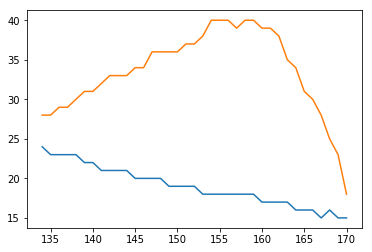

In [7]:
fig, ax = plt.subplots()
ax.plot(tmp['ANG_MIN'])
ax.plot(tmp['ANG_MAX'])

위 데이터에서 신빙성 있는 속도, 각도 구간을 구한다

138 이상 23 ~ 29도 

142 이상 21 ~ 33도 

147 이상 20 ~ 36도 

150 이상 19 ~ 36도 

154 이상 18 ~ 40도 

167 이상 15 ~ 45도

172 이상 9도 ~ 51도
